<a href="https://colab.research.google.com/github/Jaqueline-Silva3001/Controle-de-Processos/blob/main/Pr%C3%A1tica_4_An%C3%A1lise_de_par%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -qq control

import numpy as  np
import matplotlib.pyplot as plt
import control as ct


# Ajustando o tamanho da fonte e espaçamento de linha de saída das células: OPCIONAL
from IPython.display import HTML
shell = get_ipython()

def adjust_font_and_line_spacing():
    display(HTML('''
    <style>
        body {
            font-size: 25px;
        }
    </style>
    '''))

if adjust_font_and_line_spacing not in shell.events.callbacks['pre_execute']:
    shell.events.register('pre_execute', adjust_font_and_line_spacing)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 6.4 MB/s eta 0:00:00


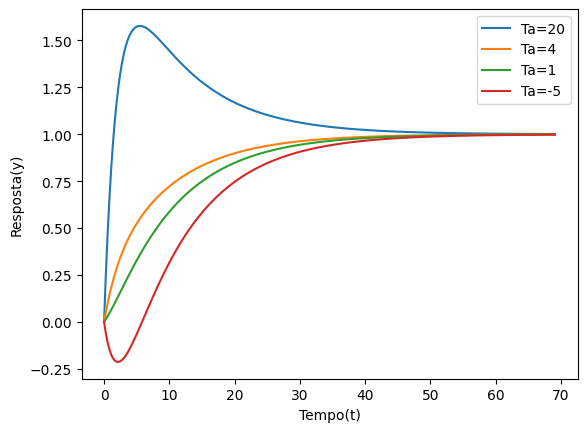

In [2]:
# EFEITOS DE DINÂMICA NO NUMERADOR

casos = [20, 4, 1, -5]
s = ct.tf('s')
deltaU = 0.5

for Ta in casos:

  G = 2*(Ta*s+1)/((10*s+1)*(2*s+1))
  t, y = ct.step_response(G)
  yn = y*deltaU
  plt.plot(t, yn, label = f'Ta={Ta}')
  plt.legend()
  plt.grid
  plt.xlabel('Tempo(t)')
  plt.ylabel('Resposta(y)')






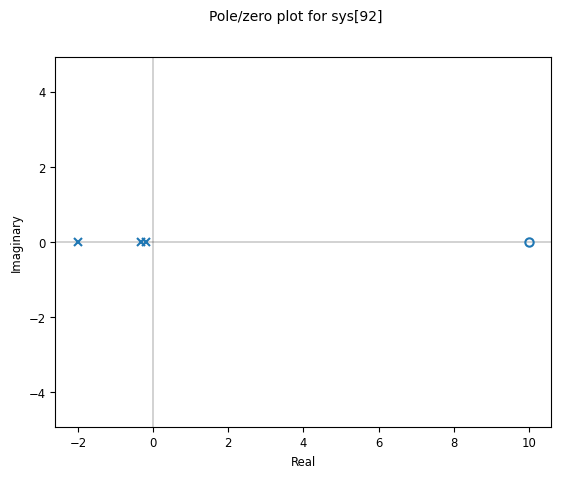

In [3]:
# REGRA DA METADE DE SKOGESTAD
G = 5*(-0.1*s+1)/((5*s+1)*(3*s+1)*(0.5*s+1))
G = ct.tf(G, display_format = 'zpk')
ct.pzmap(G)





Text(0, 0.5, 'Resposta(y)')

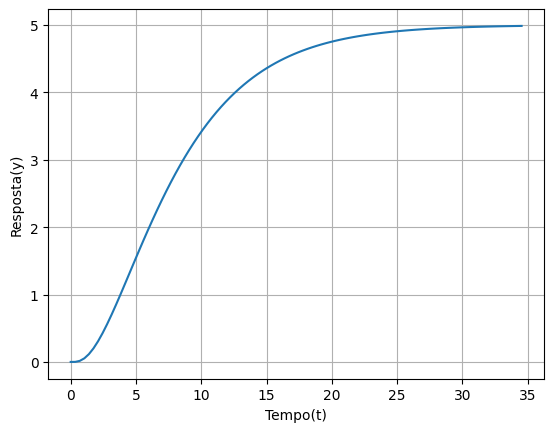

In [4]:
t, y = ct.step_response(G)
plt.plot(t, y)
plt.grid()
plt.xlabel('Tempo(t)')
plt.ylabel('Resposta(y)')

Text(0, 0.5, 'Resposta(y)')

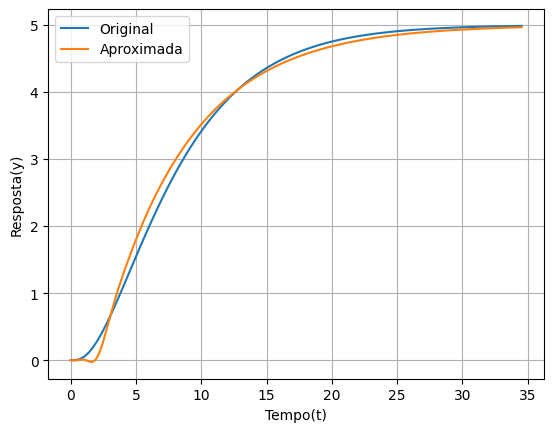

In [5]:
# IMPLEMENTANDO A APROXIMAÇÃO:

# Tempo morto Padé:
teta = 2.1
num, den = ct.pade(teta, 5, 3)
Gdelay = ct.tf(num, den)

# Função de transferência aproximada:
Gapx = ct.tf(5,[6.5, 1])*Gdelay

# Simulação da aproximação:
tapx, yapx = ct.step_response(Gapx, T =t[-1])
plt.plot(t, y, label = 'Original')
plt.plot(tapx, yapx, label = 'Aproximada')
plt.legend()
plt.grid()
plt.xlabel('Tempo(t)')
plt.ylabel('Resposta(y)')